# Sprint 2
## In this file we do code for sentiment analysis


In [3]:
# imports 
import re
import sqlite3
import emoji

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

from tqdm import tqdm
from matplotlib.ticker import MaxNLocator
from datetime import datetime 

tqdm.pandas()

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [4]:
# path to the database 

path_to_db = '/Users/alexraudvee/Downloads/test.db'

In [5]:
# connection to the database with sentiment scores

try:
    connection = sqlite3.connect(path_to_db)
    print('Successfully connected to the database')

    query = """
        SELECT name FROM sqlite_master  
        WHERE type='table';
        """

    cursor = connection.cursor()
    cursor.execute(query)
    list_of_tables = cursor.fetchall()

    print('---TABLE NAMES IN DB---')
    for table_name in list_of_tables:
        print('-----------------------')
        print(table_name[0])

    print('-----------------------')
    
except sqlite3.Error as e:
    print(e)


Succesfuly connected to the database
---TABLE NAMES IN DB---
-----------------------
users
-----------------------
tweets
-----------------------
tweets_geo
-----------------------
replies
-----------------------
retweets
-----------------------
quotes
-----------------------
hashtags
-----------------------
sqlite_sequence
-----------------------
symbols
-----------------------
user_mentions
-----------------------


In [6]:
# tweets table
def get_tweets(conn):
    query = """
        SELECT *
        FROM tweets
    """

    df = pd.read_sql(query, conn)
    return df

# users table
def get_users(conn):
    query = """
        SELECT *
        FROM users
    """

    df = pd.read_sql(query, conn)
    return df

# tweets geo table 
def get_tweets_geo(conn):
    query = """
        SELECT *
        FROM tweets_geo
    """

    df = pd.read_sql(query, conn)
    return df

# replies table
def get_replies(conn):
    query = """
        SELECT *
        FROM replies
    """

    df = pd.read_sql(query, conn)
    return df

# retweets table
def get_retweets(conn):
    query = """
        SELECT *
        FROM retweets
    """

    df = pd.read_sql(query, conn)
    return df

# quotes table
def get_quotes(conn):
    query = """
        SELECT *
        FROM quotes
    """

    df = pd.read_sql(query, conn)
    return df

# hastags table 
def get_hashtags(conn):
    query = """
        SELECT *
        FROM hashtags
    """

    df = pd.read_sql(query, conn)
    return df

# symbols table 
def get_symbols(conn):
    query = """
        SELECT *
        FROM symbols
    """

    df = pd.read_sql(query, conn)
    return df

# user mentions table 
def get_user_mentions(conn):
    query = """
        SELECT *
        FROM user_mentions
    """

    df = pd.read_sql(query, conn)
    return df

In [7]:
# construct the dataframes for further analysis 

df_tweets = get_tweets(conn=connection)
df_users = get_users(conn=connection)
df_replies = get_replies(conn=connection)
df_retweets = get_retweets(conn=connection)
df_quotes = get_quotes(conn=connection)
df_tweets_geo = get_tweets_geo(conn=connection)
df_user_metions = get_user_mentions(conn=connection)
df_symbols = get_symbols(conn=connection)
df_hastags = get_hashtags(conn=connection)

In [8]:
# function to convert the sentiment label in numeric value

def convert_lable(lable):
    
    if lable == 'neutral':
        return int(0)
    elif lable == 'negative':
        return int(-1)
    elif lable == 'positive':
        return int(1)
    else:
        return None

In [9]:
# add new column with numeric values

df_tweets['sentiment_numeric'] = df_tweets['sentiment_label'].apply(lambda row: convert_lable(row))

In [10]:
# introduce the info about the companies like names, ids, symbols and hastags

avia_companies = {'KLM': 56377143, 'AirFrance': 106062176, 'British_Airways': 18332190, 'AmericanAir': 22536055,
                  'Lufthansa': 124476322, 'AirBerlin': 26223583,
                  'AirBerlin assist': 2182373406, 'easyJet': 38676903, 'RyanAir': 1542862735, 'SingaporeAir': 253340062,
                  'Qantas': 218730857, 'EtihadAirways': 45621423,
                  'VirginAtlantic': 20626359}

# British Airways, EtihadAirways, VirginAtlantic are private companies, so no tickers of those are available
# AirFrance and KLM had a merger at 2004 same with AirBerlin and AirBerlin assist
# AirBerlin assist is not listed
# Write a regular expression for Air Berlin, RyanAir because they have matching pattern


stock = {56377143: ['AF.PA', 'AFLYY', 'AFRAF', 'AFR.F', 'AIRF-U.TI'],  # KLM
         106062176: ['AF.PA', 'AFLYY', 'AFRAF', 'AFR.F', 'AIRF-U.TI'],  # AirFrance
         22536055: ['AAL', 'A1G.DU', 'AAL.MX', 'AAL.BA'],  # AmericanAir
         124476322: ['LHA.DE', 'DLAKY', 'LHA.F', 'DLAKF', 'LHA.SG'],  # Lufthansa
         26223583: ['AB1.F', 'AB1.HA', 'AB1.MU', 'AB1.DU', 'AB1.BE', 'AB1.HM'],  # AirBerlin
         38676903: ['EZJ.L', 'ESYJY', 'EJT1.DE', 'EJTTF', 'EJT1.HA', 'EJTS.F'],  # EasyJet
         1542862735: ['RYAAY', 'RYA.IR', 'RY4C.F', 'RY4C.DE', 'RY4C.BE', 'RY4C.DU'],  # RyanAir
         253340062: ['C6L.SI', 'SINGY', 'SINGF', 'SIA1.MU', 'SIA.MU', 'SIA1.HA']}  # SingaporeAir

In [11]:
df_tweets['timestamp_ms_int'] = df_tweets['timestamp_ms'].astype(int)
df_tweets['timestamp_int'] = df_tweets['timestamp_ms_int'] / 1000
df_tweets['till_minute_str'] = df_tweets['timestamp_int'].apply(lambda row: datetime.fromtimestamp(row).__format__('%Y/%m/%d %H:%M'))


In [12]:
# convert time stamps into year, month, day, hour, minute

df_tweets['year'] = pd.to_datetime(df_tweets['timestamp_ms'],unit='ms').dt.year
df_tweets['month'] = pd.to_datetime(df_tweets['timestamp_ms'],unit='ms').dt.month
df_tweets['week'] = pd.to_datetime(df_tweets['timestamp_ms'],unit='ms').dt.isocalendar().week
df_tweets['day'] = pd.to_datetime(df_tweets['timestamp_ms'],unit='ms').dt.day
df_tweets['hour'] = pd.to_datetime(df_tweets['timestamp_ms'],unit='ms').dt.hour
df_tweets['minute'] = pd.to_datetime(df_tweets['timestamp_ms'],unit='ms').dt.minute

In [13]:
# prepare the data for visualisations

# get rid of und languages
tweets_per_language = df_tweets.groupby(by ='lang').count().sort_values(by='tweet_id', ascending = False).reset_index()
tweets_per_language = tweets_per_language.loc[(tweets_per_language['lang']!= 'und')]



# functions for cleaning the text

def demojize_emoji(text):
    return emoji.demojize(text)

def remove_entities(text):
    # Getting rid off \n and \r
    text = text.replace('\r', r'').replace('\n', r' ')

    text = re.sub(r"(?:(https?|www)\://)\S+|#|:|\$|@", r" ", text)

    text = re.sub(r'[^\x00-\x7f]', r'', text)
    
    return text

def filter_chars(a):
    sent = []
    for word in a.split(' '):
        if ('$' in word) | ('&' in word):
            sent.append('')
        else:
            sent.append(word)
    return ' '.join(sent)

def remove_mult_spaces(text): ## remove multiple spaces
    return re.sub("\s\s+" , " ", text)

def remove_spam(text):
    match = re.search(r'subscribe', text)
    if match:
        return ''
    else:
        return text
    



# cleaning the text
text_new = []
for t in tqdm(df_tweets.text):
    text_new.append(remove_spam(remove_mult_spaces(filter_chars(remove_entities(demojize_emoji(t))))))
    
df_tweets['text_clean'] = text_new
df_tweets['text_clean'] = df_tweets['text_clean'].str.lower()



# get the length of the text 
text_len = []
for text in tqdm(df_tweets.text_clean):
    tweet_len = len(text.split())
    text_len.append(tweet_len)

df_tweets['text_clean_len'] = text_len



# reset index 
tweets = df_tweets.reset_index(drop=True)



# geting the tweets about british airways 
british = []
avia_code = avia_companies['British_Airways']

for k, i in tqdm(enumerate(tweets['text_clean']), total = len(tweets)):
    pattern = re.compile(r'([B|b]ritish.?[A|a]irways)')
    if (avia_code in stock.keys()):
        if any(ticker in i for ticker in stock[avia_code]):
            british.append(tweets.loc[k,'tweet_id'])
    if bool(pattern.search(i)):
        british.append(tweets.loc[k,'tweet_id'])

british = list(set(british))



# geting the tweets about american air
american = []
avia_code = avia_companies['AmericanAir']

for k, i in tqdm(enumerate(tweets['text_clean']), total = len(tweets)):
    pattern = re.compile(r'[A|a]merican.?[A|a]ir')
    if (avia_code in stock.keys()):
        if any(ticker in i for ticker in stock[avia_code]):
            american.append(tweets.loc[k,'tweet_id'])
    if bool(pattern.search(i)):
        american.append(tweets.loc[k,'tweet_id'])
        
american = list(set(american))



# geting the tweets about easyjet
easy = []
avia_code = avia_companies['easyJet']

for k, i in tqdm(enumerate(tweets['text_clean']), total = len(tweets)):
    pattern = re.compile(r'[E|e]asy.?[J|j]et')
    if (avia_code in stock.keys()):
        if any(ticker in i for ticker in stock[avia_code]):
            easy.append(tweets.loc[k,'tweet_id'])
    if bool(pattern.search(i)):
        easy.append(tweets.loc[k,'tweet_id'])

easy = list(set(easy))



# geting the tweets about ryanair 
ryanair = []
avia_code = avia_companies['RyanAir']

for k, i in tqdm(enumerate(tweets['text_clean']), total = len(tweets)):
    pattern = re.compile(r'[R|r]yan.?[A|a]ir')
    if (avia_code in stock.keys()):
        if any(ticker in i for ticker in stock[avia_code]):
            ryanair.append(tweets.loc[k,'tweet_id'])
    if bool(pattern.search(i)):
        ryanair.append(tweets.loc[k,'tweet_id'])
    
ryanair = list(set(ryanair))



# geting the tweets about KLM and AirFrance and joining them
airfrance_klm = []
avia_code_1 = avia_companies['RyanAir']
avia_code_2 = avia_companies['AirFrance']

for k, i in tqdm(enumerate(tweets['text_clean']), total = len(tweets)):
    pattern = re.compile(r'([K|k][L|l][M|m])|([A|a]ir.?[F|f]rance)')
    if (avia_code_1 in stock.keys()):
        if any(ticker in i for ticker in stock[avia_code_1]):
            airfrance_klm.append(tweets.loc[k,'tweet_id'])
            
    if (avia_code_2 in stock.keys()):
        if any(ticker.lower() in i for ticker in stock[avia_code_2]):
            airfrance_klm.append(tweets.loc[k,'tweet_id'])
            
    if bool(pattern.search(i)):
        airfrance_klm.append(tweets.loc[k,'tweet_id'])
    
airfrance_klm = list(set(airfrance_klm))



# getting the tweets about airberlin 
airberlin = []
avia_code_1 = avia_companies['AirBerlin']
avia_code_2 = avia_companies['AirBerlin assist']

for k, i in tqdm(enumerate(tweets['text_clean']), total = len(tweets)):
    
    pattern = re.compile(r'[A|a]ir.?[B|b]erlin.?(assist)?')
    
    if (avia_code_1 in stock.keys()):
        if any(ticker in i for ticker in stock[avia_code_1]):
            airberlin.append(tweets.loc[k,'tweet_id'])
            
    if (avia_code_2 in stock.keys()):
        if any(ticker in i for ticker in stock[avia_code_2]):
            airberlin.append(tweets.loc[k,'tweet_id'])
            
    if bool(pattern.search(i)):
        airberlin.append(tweets.loc[k,'tweet_id'])
    
airberlin = list(set(airberlin))



# getting the tweets about lufthansa 
lufthansa = []
avia_code = avia_companies['Lufthansa']

for k, i in tqdm(enumerate(tweets['text_clean']), total = len(tweets)):
    pattern = re.compile(r'[L|l]ufthansa')
    if (avia_code in stock.keys()):
        if any(ticker in i for ticker in stock[avia_code]):
            lufthansa.append(tweets.loc[k,'tweet_id'])
    if bool(pattern.search(i)):
        lufthansa.append(tweets.loc[k,'tweet_id'])

lufthansa = list(set(lufthansa))



# getting the tweets about singapore air 
singapore = []
avia_code = avia_companies['SingaporeAir']

for k, i in tqdm(enumerate(tweets['text_clean']), total = len(tweets)):
    pattern = re.compile(r'[S|s]ingapore.?[A|a]ir')
    if (avia_code in stock.keys()):
        if any(ticker in i for ticker in stock[avia_code]):
            singapore.append(tweets.loc[k,'tweet_id'])
    if bool(pattern.search(i)):
        singapore.append(tweets.loc[k,'tweet_id'])

singapore = list(set(singapore))



# getting the tweets about quantas 
qantas = []

avia_code = avia_companies['Qantas']
for k, i in tqdm(enumerate(tweets['text_clean']), total = len(tweets)):
    pattern = re.compile(r'[Q|q]antas')
    if bool(pattern.search(i)):
        qantas.append(tweets.loc[k,'tweet_id'])
    if (avia_code in stock.keys()):
        if (ticker in i for ticker in stock[avia_code]):
            qantas.append(tweets.loc[k,'tweet_id'])
    
qantas = list(set(qantas))



# getting the tweets about eithand airways 
etihad = []

avia_code = avia_companies['EtihadAirways']
for k, i in tqdm(enumerate(tweets['text_clean']), total = len(tweets)):
    pattern = re.compile(r'[E|e]tihad.?[A|a]irways')
    if bool(pattern.search(i)):
        etihad.append(tweets.loc[k,'tweet_id'])
    if (avia_code in stock.keys()):
        if (ticker in i for ticker in stock[avia_code]):
            etihad.append(tweets.loc[k,'tweet_id'])

etihad = list(set(etihad))



# getting the tweets about virgin atlantic 
virgin = []

avia_code = avia_companies['VirginAtlantic']
for k, i in tqdm(enumerate(tweets['text_clean']), total = len(tweets)):
    pattern = re.compile(r'[V|v]irgin.?[A|a]tlantic')
    if bool(pattern.search(i)):
        virgin.append(tweets.loc[k,'tweet_id'])
    if (avia_code in stock.keys()):
        if (ticker in i for ticker in stock[avia_code]):
            virgin.append(tweets.loc[k,'tweet_id'])

virgin = list(set(virgin))

100%|██████████| 6094135/6094135 [00:20<00:00, 299208.36it/s]


In [14]:
# construct dataframe for each company separately

airfrance_klm_tweets = tweets[(tweets['lang']=='en')&
                              (tweets['tweet_type']!='reply')&
                              (tweets['tweet_id'].isin(airfrance_klm))]


ryanair_tweets = tweets[(tweets['lang']=='en')&
                        (tweets['tweet_type']!='reply')&
                        (tweets['tweet_id'].isin(ryanair))]


virginatlantic_tweets = tweets[(tweets['lang']=='en')&
                               (tweets['tweet_type']!='reply')&
                               (tweets['tweet_id'].isin(virgin))]


lufthansa_tweets = tweets[(tweets['lang']=='en')&
                          (tweets['tweet_type']!='reply')&
                          (tweets['tweet_id'].isin(lufthansa))]


qantas_tweets = tweets[(tweets['lang']=='en')&
                       (tweets['tweet_type']!='reply')&
                       (tweets['tweet_id'].isin(qantas))]


etihadairways_tweets = tweets[(tweets['lang']=='en')& 
                              (tweets['tweet_type']!='reply')&
                              (tweets['tweet_id'].isin(etihad))]


singaporeair_tweets = tweets[(tweets['lang']=='en')& 
                             (tweets['tweet_type']!='reply')&
                             (tweets['tweet_id'].isin(singapore))]


airberlin_tweets = tweets[(tweets['lang']=='en')&
                          (tweets['tweet_type']!='reply')&
                          (tweets['tweet_id'].isin(airberlin))]

In [ ]:

american_air_tweets = tweets[(tweets['lang']=='en')&
                          (tweets['tweet_type']!='reply')&
                          (tweets['tweet_id'].isin(american))]

In [15]:
# client and competitor 

easyjet_tweets = tweets[(tweets['lang']=='en')&
                        (tweets['tweet_type']!='reply')&
                        (tweets['tweet_id'].isin(easy))]


britishairways_tweets = tweets[(tweets['lang']=='en')& 
                               (tweets['tweet_type']!='reply')&
                               (tweets['tweet_id'].isin(british))]

In [45]:
# add aditional columns related to the time series for all companies

easyjet_tweets['till_hour_str'] = easyjet_tweets['timestamp_int'].progress_apply(lambda row: datetime.fromtimestamp(row).__format__('%Y/%m/%d %H'))
easyjet_tweets['day_of_year'] = pd.to_datetime(easyjet_tweets['timestamp_ms'],unit='ms').dt.day_of_year

britishairways_tweets['till_hour_str'] = britishairways_tweets['timestamp_int'].progress_apply(lambda row: datetime.fromtimestamp(row).__format__('%Y/%m/%d %H'))
britishairways_tweets['day_of_year'] = pd.to_datetime(britishairways_tweets['timestamp_ms'],unit='ms').dt.day_of_year

airfrance_klm_tweets['till_hour_str'] = airfrance_klm_tweets['timestamp_int'].progress_apply(lambda row: datetime.fromtimestamp(row).__format__('%Y/%m/%d %H'))
airfrance_klm_tweets['day_of_year'] = pd.to_datetime(airfrance_klm_tweets['timestamp_ms'],unit='ms').dt.day_of_year

ryanair_tweets['till_hour_str'] = ryanair_tweets['timestamp_int'].progress_apply(lambda row: datetime.fromtimestamp(row).__format__('%Y/%m/%d %H'))
ryanair_tweets['day_of_year'] = pd.to_datetime(ryanair_tweets['timestamp_ms'],unit='ms').dt.day_of_year

virginatlantic_tweets['till_hour_str'] = virginatlantic_tweets['timestamp_int'].progress_apply(lambda row: datetime.fromtimestamp(row).__format__('%Y/%m/%d %H'))
virginatlantic_tweets['day_of_year'] = pd.to_datetime(virginatlantic_tweets['timestamp_ms'],unit='ms').dt.day_of_year

lufthansa_tweets['till_hour_str'] = lufthansa_tweets['timestamp_int'].progress_apply(lambda row: datetime.fromtimestamp(row).__format__('%Y/%m/%d %H'))
lufthansa_tweets['day_of_year'] = pd.to_datetime(lufthansa_tweets['timestamp_ms'],unit='ms').dt.day_of_year

qantas_tweets['till_hour_str'] = qantas_tweets['timestamp_int'].progress_apply(lambda row: datetime.fromtimestamp(row).__format__('%Y/%m/%d %H'))
qantas_tweets['day_of_year'] = pd.to_datetime(qantas_tweets['timestamp_ms'],unit='ms').dt.day_of_year

etihadairways_tweets['till_hour_str'] = etihadairways_tweets['timestamp_int'].progress_apply(lambda row: datetime.fromtimestamp(row).__format__('%Y/%m/%d %H'))
etihadairways_tweets['day_of_year'] = pd.to_datetime(etihadairways_tweets['timestamp_ms'],unit='ms').dt.day_of_year

singaporeair_tweets['till_hour_str'] = singaporeair_tweets['timestamp_int'].progress_apply(lambda row: datetime.fromtimestamp(row).__format__('%Y/%m/%d %H'))
singaporeair_tweets['day_of_year'] = pd.to_datetime(singaporeair_tweets['timestamp_ms'],unit='ms').dt.day_of_year

airberlin_tweets['till_hour_str'] = airberlin_tweets['timestamp_int'].progress_apply(lambda row: datetime.fromtimestamp(row).__format__('%Y/%m/%d %H'))
airberlin_tweets['day_of_year'] = pd.to_datetime(airberlin_tweets['timestamp_ms'],unit='ms').dt.day_of_year

100%|██████████| 350621/350621 [00:02<00:00, 173566.60it/s]
/var/folders/22/gxvfn3cx2_v64ngzhq52h2180000gn/T/ipykernel_51780/1005429203.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  easyjet_tweets['till_hour_str'] = easyjet_tweets['timestamp_int'].progress_apply(lambda row: datetime.fromtimestamp(row).__format__('%Y/%m/%d %H'))
/var/folders/22/gxvfn3cx2_v64ngzhq52h2180000gn/T/ipykernel_51780/1005429203.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  easyjet_tweets['day_of_year'] = pd.to_datetime(e

In [44]:
# add aditional columns related to the time series for client and competitor 

easyjet_tweets['till_hour_str'] = easyjet_tweets['timestamp_int'].progress_apply(lambda row: datetime.fromtimestamp(row).__format__('%Y/%m/%d %H'))
easyjet_tweets['day_of_year'] = pd.to_datetime(easyjet_tweets['timestamp_ms'],unit='ms').dt.day_of_year

britishairways_tweets['till_hour_str'] = britishairways_tweets['timestamp_int'].progress_apply(lambda row: datetime.fromtimestamp(row).__format__('%Y/%m/%d %H'))
britishairways_tweets['day_of_year'] = pd.to_datetime(britishairways_tweets['timestamp_ms'],unit='ms').dt.day_of_year

100%|██████████| 350621/350621 [00:02<00:00, 162060.59it/s]
/var/folders/22/gxvfn3cx2_v64ngzhq52h2180000gn/T/ipykernel_51780/1736162798.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  easyjet_tweets['till_hour_str'] = easyjet_tweets['timestamp_int'].progress_apply(lambda row: datetime.fromtimestamp(row).__format__('%Y/%m/%d %H'))
/var/folders/22/gxvfn3cx2_v64ngzhq52h2180000gn/T/ipykernel_51780/1736162798.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  easyjet_tweets['day_of_year'] = pd.to_datetime(e

In [47]:
# check cell
# type the variable here to see what they stands for

## What is the mean sentiment per airline?

In [18]:
# get mean of the sentiment 

britishairways_mean_sentiment = britishairways_tweets['sentiment_numeric'].mean()
airfrance_klm_mean_sentiment = airfrance_klm_tweets['sentiment_numeric'].mean()
easyjet_mean_sentiment = easyjet_tweets['sentiment_numeric'].mean()
ryanair_mean_sentiment = ryanair_tweets['sentiment_numeric'].mean()
virginatlantic_mean_sentiment = virginatlantic_tweets['sentiment_numeric'].mean()
lufthansa_mean_sentiment = lufthansa_tweets['sentiment_numeric'].mean()
qantas_mean_sentiment = qantas_tweets['sentiment_numeric'].mean()
etihadairways_mean_sentiment = etihadairways_tweets['sentiment_numeric'].mean()
singaporeair_mean_sentiment = singaporeair_tweets['sentiment_numeric'].mean()
airberlin_mean_sentiment = airberlin_tweets['sentiment_numeric'].mean()
american_air_mean_sentiment = american_air_tweets['sentiment_numeric'].mean()

# construct the data frame with means of the sentiment per Airline company

df_mean_sentiments = pd.DataFrame({'British Airways': [britishairways_mean_sentiment], 
                                   'AirFrance-KLM': [airfrance_klm_mean_sentiment], 
                                   'EasyJet': [easyjet_mean_sentiment],
                                   'RyanAir': [ryanair_mean_sentiment],
                                   'VirginAtlantic': [virginatlantic_mean_sentiment],
                                   'Lufthansa': [lufthansa_mean_sentiment],
                                   'Qantas': [qantas_mean_sentiment],
                                   'EtihadAirways': [etihadairways_mean_sentiment],
                                   'SingaporeAir': [singaporeair_mean_sentiment],
                                   'AirBerlin': [airberlin_mean_sentiment],
                                   'AmericanAir': [american_air_mean_sentiment]}).transpose().rename(columns={0:'mean'}).reset_index()

/var/folders/22/gxvfn3cx2_v64ngzhq52h2180000gn/T/ipykernel_51780/1516139043.py:45: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  below_average = df_mean_sentiments[df_mean_sentiments.sort_values(ascending=True, by='mean')['mean']<average]
/var/folders/22/gxvfn3cx2_v64ngzhq52h2180000gn/T/ipykernel_51780/1516139043.py:46: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  above_average = df_mean_sentiments[df_mean_sentiments.sort_values(ascending=True, by='mean')['mean']>=average]


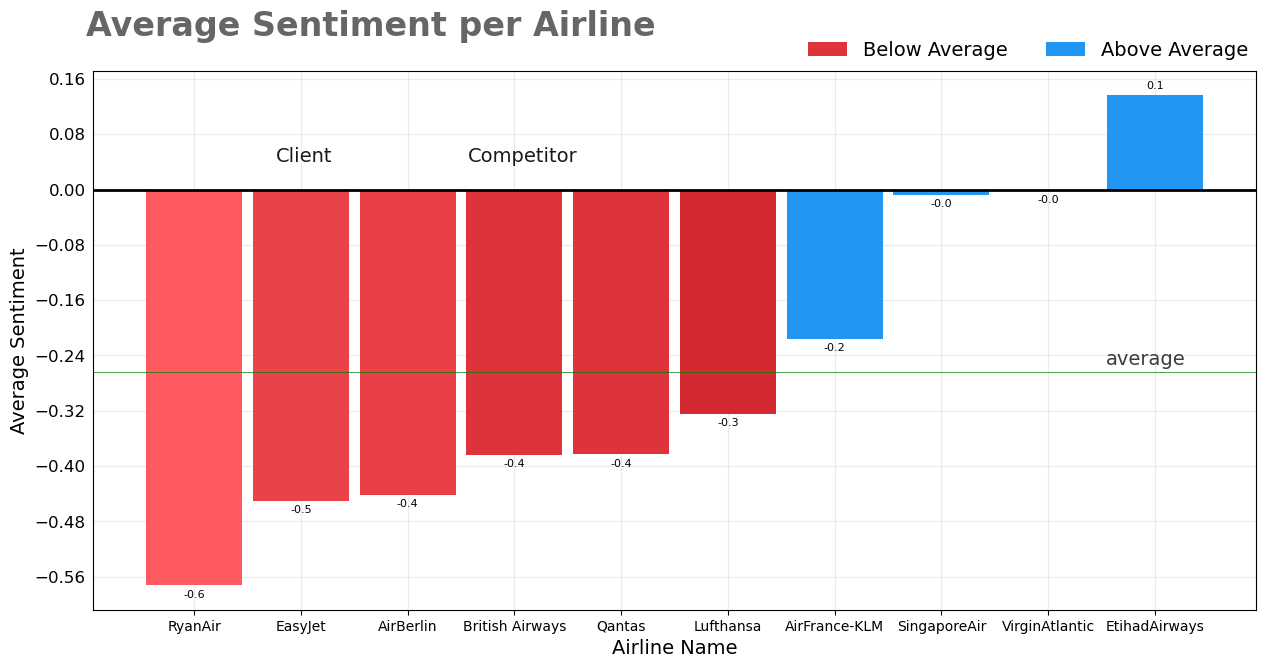

In [184]:
# introduce the colours and color map
colours = ["#2196f3", "#bbdefb"]
cmap = mpl.colors.LinearSegmentedColormap.from_list("colour_map", colours, N=256)
norm = mpl.colors.Normalize(df_mean_sentiments.sort_values(ascending=True, by='mean')['mean'].min(), df_mean_sentiments.sort_values(ascending=True, by='mean')['mean'].max()) # linearly normalizes data into the [0.0, 1.0] interval

# initialize the plot
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,7))

# the plot itself
bars = ax.bar(df_mean_sentiments.sort_values(ascending=True, by='mean')['index'], df_mean_sentiments.sort_values(ascending=True, by='mean')['mean'], width=0.9, color=cmap(norm(df_mean_sentiments.sort_values(ascending=True, by='mean')['mean'])), zorder=2)

# reformat x axis
ax.set_xlabel('Airline Name', size=14)

# title 
ax.text(x=0.12, y=.93, s="Average Sentiment per Airline", transform=fig.transFigure, ha='left', fontsize=24, weight='bold', alpha=.6)

# average line
ax.text(x=.8, y=.46, s="average", transform=fig.transFigure, ha='left', fontsize=14, alpha=.76)

# we text
ax.text(x=.247, y=.75, s="Client", transform=fig.transFigure, ha='left', fontsize=14, alpha=.9, color='black')

# competitor text
ax.text(x=.375, y=.75, s="Competitor", transform=fig.transFigure, ha='left', fontsize=14, alpha=.9, color='black')

# do the grid 
ax.grid(which="major", axis='x', color='#DAD8D7', alpha=0.5, zorder=1)
ax.grid(which="major", axis='y', color='#DAD8D7', alpha=0.5, zorder=1)

# roformat y axis
ax.set_ylabel('Average Sentiment', size=14)
ax.yaxis.set_label_position("left")
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_tick_params(pad=2, labeltop=False, labelbottom=True, bottom=False, labelsize=12)

# Add label on top of each bar
ax.bar_label(bars, labels=[f'{e:,.1f}' for e in df_mean_sentiments.sort_values(ascending=True, by='mean')['mean']], padding=3, color='black', fontsize=8)

colors_low = ["#ff5a5f", "#c81d25"] # Extreme colours of the high scale
colors_high = ["#2196f3","#bbdefb"] # Extreme colours of the low scale

# find the average
average = df_mean_sentiments.sort_values(ascending=True, by='mean')['mean'].mean()
below_average = df_mean_sentiments[df_mean_sentiments.sort_values(ascending=True, by='mean')['mean']<average]
above_average = df_mean_sentiments[df_mean_sentiments.sort_values(ascending=True, by='mean')['mean']>=average]

# Colormap - Build the colour maps
cmap_low = mpl.colors.LinearSegmentedColormap.from_list("low_map", colors_low, N=256)
cmap_high = mpl.colors.LinearSegmentedColormap.from_list("high_map", colors_high, N=256)
norm_low = mpl.colors.Normalize(df_mean_sentiments.sort_values(ascending=True, by='mean')['mean'].min(), average) # linearly normalizes data into the [0.0, 1.0] interval
norm_high = mpl.colors.Normalize(df_mean_sentiments.sort_values(ascending=True, by='mean')['mean'].max())

# Plot bars and average (horizontal) line
bars = ax.bar(below_average['index'], below_average['mean'], color=cmap_low(norm_low(below_average['mean'])), width=0.9, label='Below Average', zorder=2)
bars = ax.bar(above_average['index'], above_average['mean'], color=cmap_high(norm_high(above_average['mean'])), width=0.9, label='Above Average', zorder=2)
plt.axhline(y=0, color = 'black', linewidth=2)
plt.axhline(y=average, color = 'green', linewidth=0.5)

# set the legends 
ax.legend(loc="best", ncol=2, bbox_to_anchor=[1, 1.07], borderaxespad=0, frameon=False, fontsize=14);

# saving code 
fig.get_figure().savefig('Average_sent_per_comp.png')

## Distribution of sentiment per airline 

In [20]:
# construct the data frames that will contain the count of sentiment per label for every company

britishairways_sentiment = britishairways_tweets[['sentiment_label', 'tweet_id']].groupby('sentiment_label').count().reset_index().rename(columns={'tweet_id':'British Airways'})
airfrance_klm_sentiment = airfrance_klm_tweets[['sentiment_label', 'tweet_id']].groupby('sentiment_label').count().reset_index().rename(columns={'tweet_id':'AirFrance-KLM'})
easyjet_sentiment = easyjet_tweets[['sentiment_label', 'tweet_id']].groupby('sentiment_label').count().reset_index().rename(columns={'tweet_id':'EasyJet'})
ryanair_sentiment = ryanair_tweets[['sentiment_label', 'tweet_id']].groupby('sentiment_label').count().reset_index().rename(columns={'tweet_id':'RyanAir'})
virginatlantic_sentiment = virginatlantic_tweets[['sentiment_label', 'tweet_id']].groupby('sentiment_label').count().reset_index().rename(columns={'tweet_id':'VirginAtlantic'})
lufthansa_sentiment = lufthansa_tweets[['sentiment_label', 'tweet_id']].groupby('sentiment_label').count().reset_index().rename(columns={'tweet_id':'Lufthansa'})
qantas_sentiment = qantas_tweets[['sentiment_label', 'tweet_id']].groupby('sentiment_label').count().reset_index().rename(columns={'tweet_id':'Qantas'})
etihadairways_sentiment = etihadairways_tweets[['sentiment_label', 'tweet_id']].groupby('sentiment_label').count().reset_index().rename(columns={'tweet_id':'EtihadAirways'})
singaporeair_sentiment = singaporeair_tweets[['sentiment_label', 'tweet_id']].groupby('sentiment_label').count().reset_index().rename(columns={'tweet_id':'SingaporeAir'})
airberlin_sentiment = airberlin_tweets[['sentiment_label', 'tweet_id']].groupby('sentiment_label').count().reset_index().rename(columns={'tweet_id':'AirBerlin'})

In [21]:
# merge them all in one dataframe

df_dist_sentiment = pd.merge(britishairways_sentiment, airfrance_klm_sentiment, on='sentiment_label')
df_dist_sentiment = pd.merge(df_dist_sentiment, easyjet_sentiment, on='sentiment_label')
df_dist_sentiment = pd.merge(df_dist_sentiment, ryanair_sentiment, on='sentiment_label')
df_dist_sentiment = pd.merge(df_dist_sentiment, virginatlantic_sentiment, on='sentiment_label')
df_dist_sentiment = pd.merge(df_dist_sentiment, lufthansa_sentiment, on='sentiment_label')
df_dist_sentiment = pd.merge(df_dist_sentiment, qantas_sentiment, on='sentiment_label')
df_dist_sentiment = pd.merge(df_dist_sentiment, etihadairways_sentiment, on='sentiment_label')
df_dist_sentiment = pd.merge(df_dist_sentiment, singaporeair_sentiment, on='sentiment_label')
df_dist_sentiment = pd.merge(df_dist_sentiment, airberlin_sentiment, on='sentiment_label').rename(columns={'sentiment_label': 'sentiment label'})

In [22]:
# reconstruct the dataframe for implementing in the plot 

df_dist_sentiment = df_dist_sentiment.set_index('sentiment label').transpose().sort_values(by='negative', ascending=False)

In [23]:
df_dist_sentiment

sentiment label,negative,neutral,positive
RyanAir,246366,125184,21412
EasyJet,172474,105797,32452
British Airways,163981,73106,52826
Qantas,126104,82147,33508
AirFrance-KLM,92536,90931,43552
Lufthansa,77412,82547,19290
VirginAtlantic,32268,42128,32084
SingaporeAir,8270,17592,8004
EtihadAirways,7085,16761,11971
AirBerlin,342,253,55


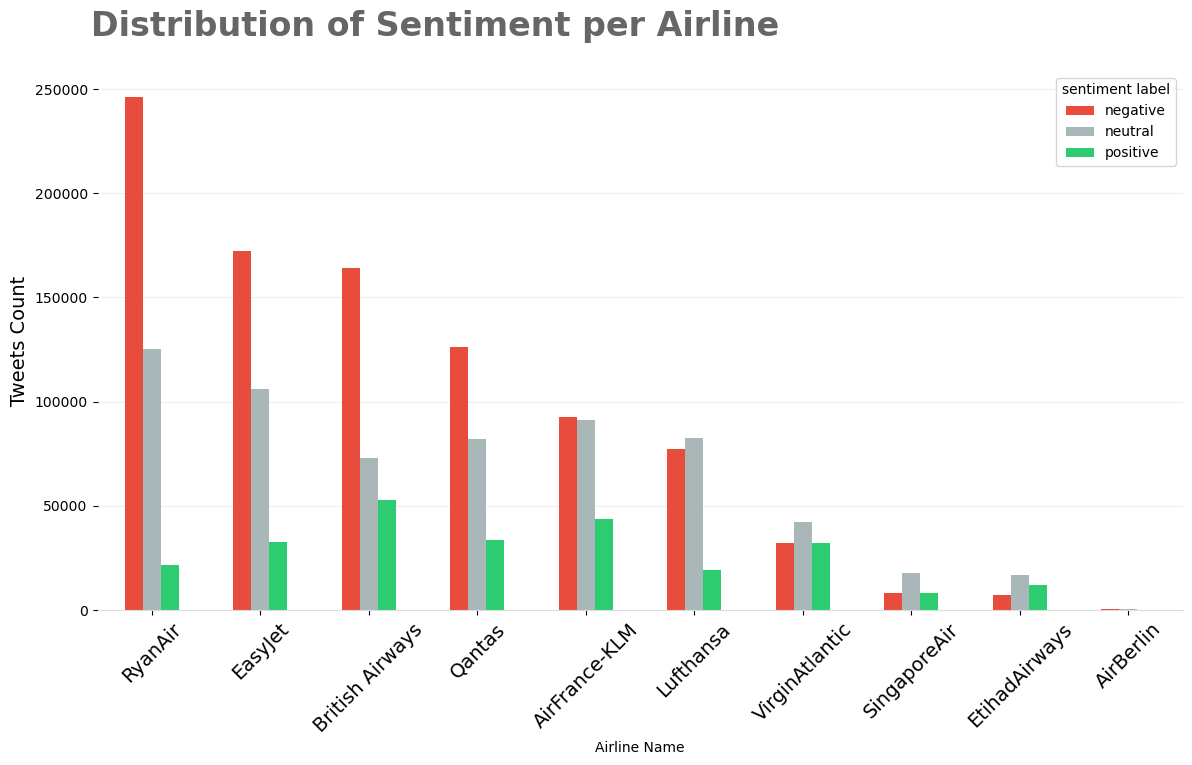

In [185]:
# initialize the axis for the plot
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14,7))

# plot inself
bars_grouped = df_dist_sentiment.plot(kind='bar', ax=ax, color=['#E74C3C', '#AAB7B8', '#2ECC71'])

# title
ax.text(x=0.12, y=.93, s="Distribution of Sentiment per Airline", transform=fig.transFigure, ha='left', fontsize=24, weight='bold', alpha=.6)

# Axis formatting.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)


# x axis 
ax.set_xlabel('Airline Name')
plt.xticks(rotation=45, size=14)

# y axis 
ax.set_ylabel('Tweets Count', size=14)

# code for saving
fig.get_figure().savefig('dist_of_sent_per_airline.png')

## Sentiment over time for EasyJet and British Airways

In [25]:
# take only needed values from initial table

easyjet_tweets_vis = easyjet_tweets[['tweet_id', 'sentiment_label', 'sentiment_numeric', 'year', 'month', 'day', 'week', 'day_of_year']]
britishairways_tweets_vis = britishairways_tweets[['tweet_id', 'sentiment_label', 'sentiment_numeric', 'year', 'month', 'day', 'week','day_of_year' ]]

In [26]:
# get the data about easyjet over the year 

# separetly for negatives positives and neutral
easyjet_neg_dof_df = easyjet_tweets_vis[easyjet_tweets_vis['sentiment_label']=='negative'].groupby('day_of_year').count()[['tweet_id']].reset_index().rename(columns={'tweet_id':'Negative'})
easyjet_neu_dof_df = easyjet_tweets_vis[easyjet_tweets_vis['sentiment_label']=='neutral'].groupby('day_of_year').count()[['tweet_id']].reset_index().rename(columns={'tweet_id':'Neutral'})
easyjet_pos_dof_df = easyjet_tweets_vis[easyjet_tweets_vis['sentiment_label']=='positive'].groupby('day_of_year').count()[['tweet_id']].reset_index().rename(columns={'tweet_id':'Positive'})

# get the data about british airways over the year 

# separetly for negatives positives and neutral
britishairways_neg_dof_df = britishairways_tweets_vis[britishairways_tweets_vis['sentiment_label']=='negative'].groupby('day_of_year').count()[['tweet_id']].reset_index().rename(columns={'tweet_id':'Negative'})
britishairways_neu_dof_df = britishairways_tweets_vis[britishairways_tweets_vis['sentiment_label']=='neutral'].groupby('day_of_year').count()[['tweet_id']].reset_index().rename(columns={'tweet_id':'Neutral'})
britishairways_pos_dof_df = britishairways_tweets_vis[britishairways_tweets_vis['sentiment_label']=='positive'].groupby('day_of_year').count()[['tweet_id']].reset_index().rename(columns={'tweet_id':'Positive'})

In [27]:
# merge them in one dataframe

easyjet_sent_all = pd.merge(easyjet_neg_dof_df, easyjet_neu_dof_df, on='day_of_year')
easyjet_sent_all = pd.merge(easyjet_sent_all, easyjet_pos_dof_df, on='day_of_year')


britishairways_sent_all = pd.merge(britishairways_neg_dof_df, britishairways_neu_dof_df, on='day_of_year')
britishairways_sent_all = pd.merge(britishairways_sent_all, britishairways_pos_dof_df, on='day_of_year')

In [28]:
# functions to get the percent of certain label

def get_percentiles_neg(negative, neutral, positive):
    """
    negatives
    """

    return negative / (negative + positive + neutral) * 100

def get_percentiles_neu(negative, neutral, positive):
    """
    neutrals
    """

    return neutral / (negative + positive + neutral) * 100

def get_percentiles_pos(negative, neutral, positive):
    """
    positives
    """

    return positive / (negative + neutral + positive) * 100

In [29]:
# apply the above function to get percentiles columns 

easyjet_sent_all['Negative_%'] = easyjet_sent_all.apply(lambda row: get_percentiles_neg(row['Negative'], row['Neutral'], row['Positive']), axis=1)
easyjet_sent_all['Neutral_%'] = easyjet_sent_all.apply(lambda row: get_percentiles_neu(row['Negative'], row['Neutral'], row['Positive']), axis=1)
easyjet_sent_all['Positive_%'] = easyjet_sent_all.apply(lambda row: get_percentiles_pos(row['Negative'], row['Neutral'], row['Positive']), axis=1)

britishairways_sent_all['Negative_%'] = britishairways_sent_all.apply(lambda row: get_percentiles_neg(row['Negative'], row['Neutral'], row['Positive']), axis=1)
britishairways_sent_all['Neutral_%'] = britishairways_sent_all.apply(lambda row: get_percentiles_neu(row['Negative'], row['Neutral'], row['Positive']), axis=1)
britishairways_sent_all['Positive_%'] = britishairways_sent_all.apply(lambda row: get_percentiles_pos(row['Negative'], row['Neutral'], row['Positive']), axis=1)

In [30]:
# find out where intersection of the ends
till = min(easyjet_sent_all.last_valid_index(), easyjet_sent_all.last_valid_index(), easyjet_sent_all.last_valid_index()) 
till2 = min(britishairways_sent_all.last_valid_index(), britishairways_sent_all.last_valid_index(), britishairways_sent_all.last_valid_index()) 

In [31]:
# check the lenghts 

len(easyjet_sent_all['Negative_%'].loc[:till].to_list()), len(easyjet_sent_all['Neutral_%'].loc[:till].to_list()), len(easyjet_sent_all['Positive_%'].loc[:till].to_list())

(237, 237, 237)

In [32]:
len(britishairways_sent_all['Negative_%'].loc[:till].to_list()), len(britishairways_sent_all['Neutral_%'].loc[:till].to_list()), len(britishairways_sent_all['Positive_%'].loc[:till].to_list())

(237, 237, 237)

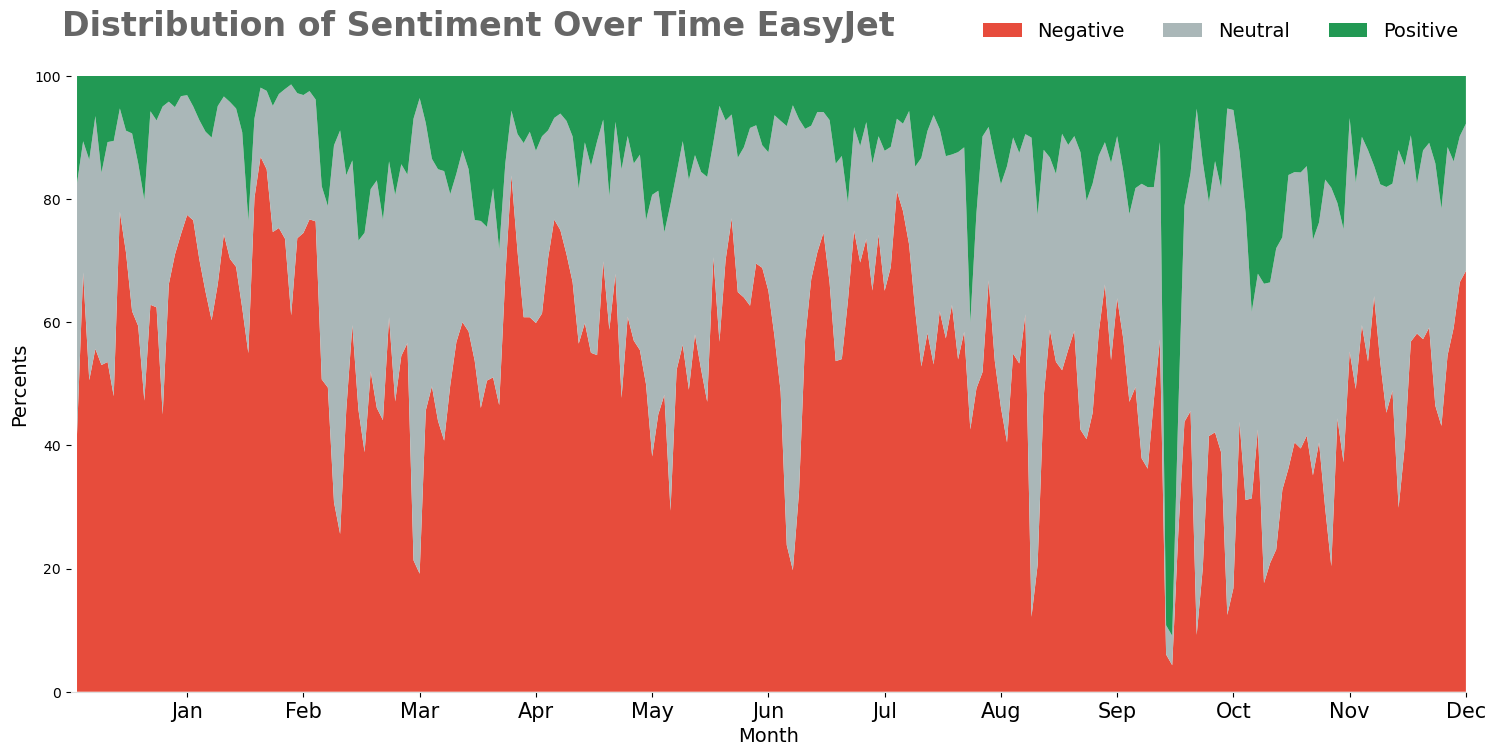

In [203]:
# initialize the axis for plots
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(18,8))

# prepare the data to input in in the plot 
x=range(1,till - 7)
y1=easyjet_sent_all['Negative_%'].loc[:227].to_list()
y2=easyjet_sent_all['Neutral_%'].loc[:227].to_list()
y3=easyjet_sent_all['Positive_%'].loc[:227].to_list()

# ploting 
ax.stackplot(x, y1, y2, y3, labels=['Negative', 'Neutral', 'Positive'], colors=['#E74C3C', '#AAB7B8', '#229954'])

# legend 
ax.legend(['Negative', 'Neutral', 'Positive'], )

# x aixis
ax.set_xlabel('Month', size=14)
ax.set_xlim(0,228)
ax.set_xticks(ticks=[ 19, 38, 57, 76, 95, 114, 133, 152, 171, 190, 209, 228], labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], size=15);

# y axis
ax.set_ylim(0,100)
ax.set_ylabel('Percents', size=14)

# one more legend
ax.legend(bbox_to_anchor=(1, 0.8), loc=3, borderaxespad=0.)

# title
ax.text(x=0.12, y=.93, s="Distribution of Sentiment Over Time EasyJet", transform=fig.transFigure, ha='left', fontsize=24, weight='bold', alpha=.6)

# Axis formatting.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')

ax.legend(loc="best", ncol=3, bbox_to_anchor=[1, 1.1], borderaxespad=0, frameon=False, fontsize=14);

# saving code 
fig.get_figure().savefig('Dist_of_sent_over_time_EJ.png')

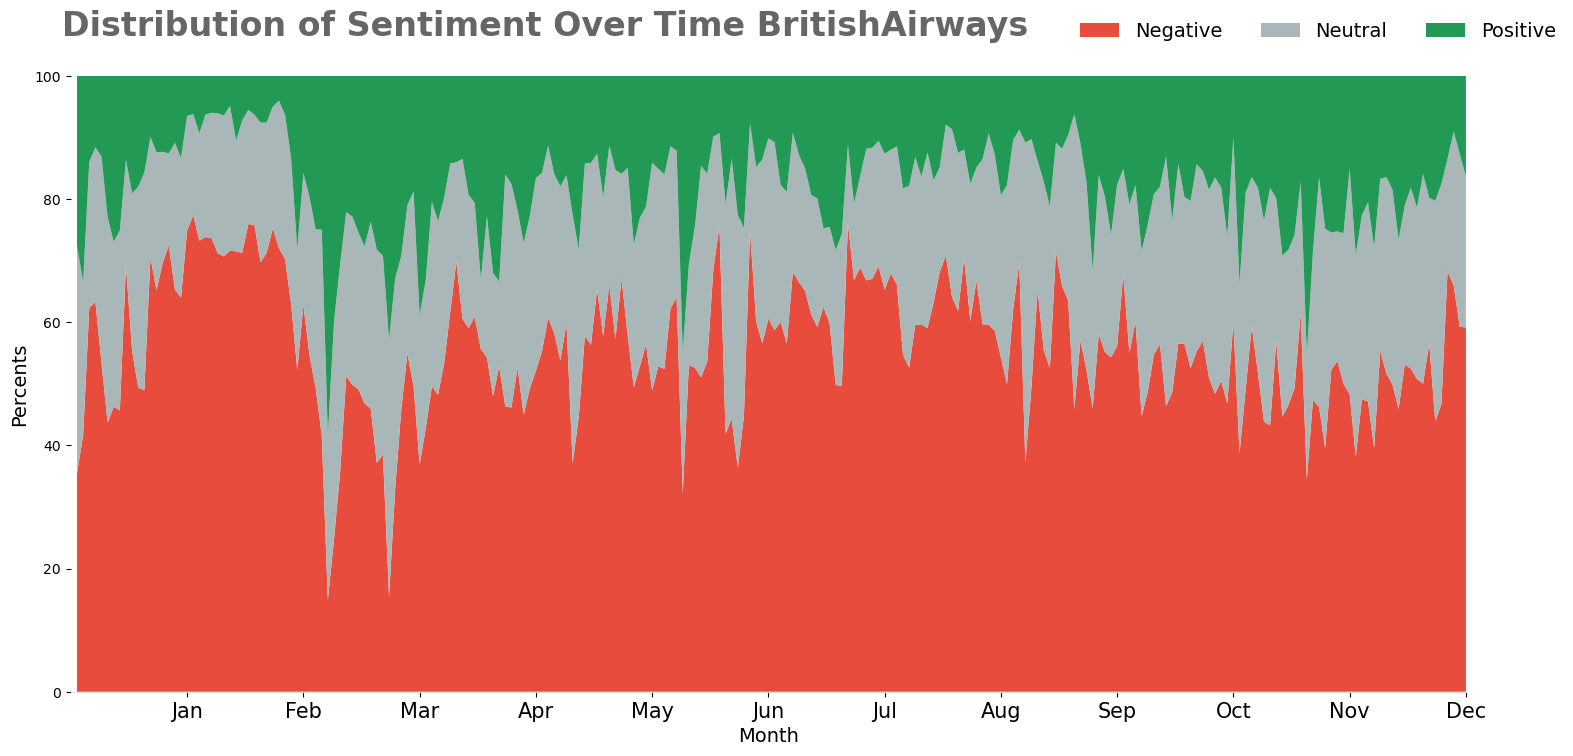

In [208]:
# initialize the figure for plot
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(18,8))

# prepare the data for plot function
x=range(1,229)
y1=britishairways_sent_all['Negative_%'].loc[:227].to_list()
y2=britishairways_sent_all['Neutral_%'].loc[:227].to_list()
y3=britishairways_sent_all['Positive_%'].loc[:227].to_list()

# plot
ax.stackplot(x, y1, y2, y3, labels=['Negative', 'Neutral', 'Positive'], colors=['#E74C3C', '#AAB7B8', '#229954'])

# legends
ax.legend(['Negative', 'Neutral', 'Positive'], )

# x axis
ax.set_xlabel('Month', size=14)
ax.set_xlim(0,228)
ax.set_xticks(ticks=[ 19, 38, 57, 76, 95, 114, 133, 152, 171, 190, 209, 228], labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], size=15);

# y axis
ax.set_ylim(0,100)
ax.set_ylabel('Percents', size=14)

# one more legend
ax.legend(loc="best", ncol=3, bbox_to_anchor=[1.07, 1.1], borderaxespad=0, frameon=False, fontsize=14);

# title
ax.text(x=0.12, y=.93, s="Distribution of Sentiment Over Time BritishAirways", transform=fig.transFigure, ha='left', fontsize=24, weight='bold', alpha=.6)

# Axis formatting.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')

# saving code
fig.get_figure().savefig('Dist_of_sent_over_time_bA.png')

## Distribution of sentiment over the day in twitter

In [97]:
# extract needed info from the dataframes and group them by hour

easyjet_tweets_od = easyjet_tweets[['tweet_id', 'sentiment_label', 'sentiment_numeric', 'hour']]
britishairways_tweets_od = britishairways_tweets[['tweet_id', 'sentiment_label', 'sentiment_numeric', 'hour']]
airfrance_klm_tweets_od = airfrance_klm_tweets[['tweet_id', 'sentiment_label', 'sentiment_numeric', 'hour']]
ryanair_tweets_od = ryanair_tweets[['tweet_id', 'sentiment_label', 'sentiment_numeric', 'hour']]
virginatlantic_tweets_od = virginatlantic_tweets[['tweet_id', 'sentiment_label', 'sentiment_numeric', 'hour']]
lufthansa_tweets_od = lufthansa_tweets[['tweet_id', 'sentiment_label', 'sentiment_numeric', 'hour']]
qantas_tweets_od = qantas_tweets[['tweet_id', 'sentiment_label', 'sentiment_numeric', 'hour']]
etihadairways_tweets_od = etihadairways_tweets[['tweet_id', 'sentiment_label', 'sentiment_numeric', 'hour']]
singaporeair_tweets_od = singaporeair_tweets[['tweet_id', 'sentiment_label', 'sentiment_numeric', 'hour']]
airberlin_tweets_od = airberlin_tweets[['tweet_id', 'sentiment_label', 'sentiment_numeric', 'hour']]

In [107]:
# get the data about companies over the day 

# separetly for negatives positives and neutral
easyjet_neg_od_df = easyjet_tweets_od[easyjet_tweets_od['sentiment_label']=='negative'].groupby('hour').count()[['tweet_id']].reset_index().rename(columns={'tweet_id':'Negative'})
easyjet_neu_od_df = easyjet_tweets_od[easyjet_tweets_od['sentiment_label']=='neutral'].groupby('hour').count()[['tweet_id']].reset_index().rename(columns={'tweet_id':'Neutral'})
easyjet_pos_od_df = easyjet_tweets_od[easyjet_tweets_od['sentiment_label']=='positive'].groupby('hour').count()[['tweet_id']].reset_index().rename(columns={'tweet_id':'Positive'})

# separetly for negatives positives and neutral
britishairways_neg_od_df = britishairways_tweets_od[britishairways_tweets_od['sentiment_label']=='negative'].groupby('hour').count()[['tweet_id']].reset_index().rename(columns={'tweet_id':'Negative'})
britishairways_neu_od_df = britishairways_tweets_od[britishairways_tweets_od['sentiment_label']=='neutral'].groupby('hour').count()[['tweet_id']].reset_index().rename(columns={'tweet_id':'Neutral'})
britishairways_pos_od_df = britishairways_tweets_od[britishairways_tweets_od['sentiment_label']=='positive'].groupby('hour').count()[['tweet_id']].reset_index().rename(columns={'tweet_id':'Positive'})

# separetly for negatives positives and neutral
airfrance_klm_neg_od_df = airfrance_klm_tweets_od[airfrance_klm_tweets_od['sentiment_label']=='negative'].groupby('hour').count()[['tweet_id']].reset_index().rename(columns={'tweet_id':'Negative'})
airfrance_klm_neu_od_df = airfrance_klm_tweets_od[airfrance_klm_tweets_od['sentiment_label']=='neutral'].groupby('hour').count()[['tweet_id']].reset_index().rename(columns={'tweet_id':'Neutral'})
airfrance_klm_pos_od_df = airfrance_klm_tweets_od[airfrance_klm_tweets_od['sentiment_label']=='positive'].groupby('hour').count()[['tweet_id']].reset_index().rename(columns={'tweet_id':'Positive'})

# separetly for negatives positives and neutral
ryanair_neg_od_df = ryanair_tweets_od[ryanair_tweets_od['sentiment_label']=='negative'].groupby('hour').count()[['tweet_id']].reset_index().rename(columns={'tweet_id':'Negative'})
ryanair_neu_od_df = ryanair_tweets_od[ryanair_tweets_od['sentiment_label']=='neutral'].groupby('hour').count()[['tweet_id']].reset_index().rename(columns={'tweet_id':'Neutral'})
ryanair_pos_od_df = ryanair_tweets_od[ryanair_tweets_od['sentiment_label']=='positive'].groupby('hour').count()[['tweet_id']].reset_index().rename(columns={'tweet_id':'Positive'})

# separetly for negatives positives and neutral
virginatlantic_neg_od_df = virginatlantic_tweets_od[virginatlantic_tweets_od['sentiment_label']=='negative'].groupby('hour').count()[['tweet_id']].reset_index().rename(columns={'tweet_id':'Negative'})
virginatlantic_neu_od_df = virginatlantic_tweets_od[virginatlantic_tweets_od['sentiment_label']=='neutral'].groupby('hour').count()[['tweet_id']].reset_index().rename(columns={'tweet_id':'Neutral'})
virginatlantic_pos_od_df = virginatlantic_tweets_od[virginatlantic_tweets_od['sentiment_label']=='positive'].groupby('hour').count()[['tweet_id']].reset_index().rename(columns={'tweet_id':'Positive'})

# separetly for negatives positives and neutral
lufthansa_neg_od_df = lufthansa_tweets_od[lufthansa_tweets_od['sentiment_label']=='negative'].groupby('hour').count()[['tweet_id']].reset_index().rename(columns={'tweet_id':'Negative'})
lufthansa_neu_od_df = lufthansa_tweets_od[lufthansa_tweets_od['sentiment_label']=='neutral'].groupby('hour').count()[['tweet_id']].reset_index().rename(columns={'tweet_id':'Neutral'})
lufthansa_pos_od_df = lufthansa_tweets_od[lufthansa_tweets_od['sentiment_label']=='positive'].groupby('hour').count()[['tweet_id']].reset_index().rename(columns={'tweet_id':'Positive'})

# separetly for negatives positives and neutral
qantas_neg_od_df = qantas_tweets_od[qantas_tweets_od['sentiment_label']=='negative'].groupby('hour').count()[['tweet_id']].reset_index().rename(columns={'tweet_id':'Negative'})
qantas_neu_od_df = qantas_tweets_od[qantas_tweets_od['sentiment_label']=='neutral'].groupby('hour').count()[['tweet_id']].reset_index().rename(columns={'tweet_id':'Neutral'})
qantas_pos_od_df = qantas_tweets_od[qantas_tweets_od['sentiment_label']=='positive'].groupby('hour').count()[['tweet_id']].reset_index().rename(columns={'tweet_id':'Positive'})

# separetly for negatives positives and neutral
etihadairways_neg_od_df = etihadairways_tweets_od[etihadairways_tweets_od['sentiment_label']=='negative'].groupby('hour').count()[['tweet_id']].reset_index().rename(columns={'tweet_id':'Negative'})
etihadairways_neu_od_df = etihadairways_tweets_od[etihadairways_tweets_od['sentiment_label']=='neutral'].groupby('hour').count()[['tweet_id']].reset_index().rename(columns={'tweet_id':'Neutral'})
etihadairways_pos_od_df = etihadairways_tweets_od[etihadairways_tweets_od['sentiment_label']=='positive'].groupby('hour').count()[['tweet_id']].reset_index().rename(columns={'tweet_id':'Positive'})

# separetly for negatives positives and neutral
singaporeair_neg_od_df = singaporeair_tweets_od[singaporeair_tweets_od['sentiment_label']=='negative'].groupby('hour').count()[['tweet_id']].reset_index().rename(columns={'tweet_id':'Negative'})
singaporeair_neu_od_df = singaporeair_tweets_od[singaporeair_tweets_od['sentiment_label']=='neutral'].groupby('hour').count()[['tweet_id']].reset_index().rename(columns={'tweet_id':'Neutral'})
singaporeair_pos_od_df = singaporeair_tweets_od[singaporeair_tweets_od['sentiment_label']=='positive'].groupby('hour').count()[['tweet_id']].reset_index().rename(columns={'tweet_id':'Positive'})

# separetly for negatives positives and neutral
airberlin_neg_od_df = airberlin_tweets_od[airberlin_tweets_od['sentiment_label']=='negative'].groupby('hour').count()[['tweet_id']].reset_index().rename(columns={'tweet_id':'Negative'})
airberlin_neu_od_df = airberlin_tweets_od[airberlin_tweets_od['sentiment_label']=='neutral'].groupby('hour').count()[['tweet_id']].reset_index().rename(columns={'tweet_id':'Neutral'})
airberlin_pos_od_df = airberlin_tweets_od[airberlin_tweets_od['sentiment_label']=='positive'].groupby('hour').count()[['tweet_id']].reset_index().rename(columns={'tweet_id':'Positive'})

In [111]:
# merge them in one dataframe per company

easyjet_sent_all_df = pd.merge(easyjet_neg_od_df, easyjet_neu_od_df, on='hour')
easyjet_sent_all_df = pd.merge(easyjet_sent_all_df, easyjet_pos_od_df, on='hour')

britishairways_sent_all_df = pd.merge(britishairways_neg_od_df, britishairways_neu_od_df, on='hour')
britishairways_sent_all_df = pd.merge(britishairways_sent_all_df, britishairways_pos_od_df, on='hour')

airfrance_klm_sent_all_df = pd.merge(airfrance_klm_neg_od_df, airfrance_klm_neu_od_df, on='hour')
airfrance_klm_sent_all_df = pd.merge(airfrance_klm_sent_all_df, airfrance_klm_pos_od_df, on='hour')

ryanair_sent_all_df = pd.merge(ryanair_neg_od_df, ryanair_neu_od_df, on='hour')
ryanair_sent_all_df = pd.merge(ryanair_sent_all_df, ryanair_pos_od_df, on='hour')

virginatlantic_sent_all_df = pd.merge(virginatlantic_neg_od_df, virginatlantic_neu_od_df, on='hour')
virginatlantic_sent_all_df = pd.merge(virginatlantic_sent_all_df, virginatlantic_pos_od_df, on='hour')

lufthansa_sent_all_df = pd.merge(lufthansa_neg_od_df, lufthansa_neu_od_df, on='hour')
lufthansa_sent_all_df = pd.merge(lufthansa_sent_all_df, lufthansa_pos_od_df, on='hour')

qantas_sent_all_df = pd.merge(qantas_neg_od_df, qantas_neu_od_df, on='hour')
qantas_sent_all_df = pd.merge(qantas_sent_all_df, qantas_pos_od_df, on='hour')

etihadairways_sent_all_df = pd.merge(etihadairways_neg_od_df, etihadairways_neu_od_df, on='hour')
etihadairways_sent_all_df = pd.merge(etihadairways_sent_all_df, etihadairways_pos_od_df, on='hour')

singaporeair_sent_all_df = pd.merge(singaporeair_neg_od_df, singaporeair_neu_od_df, on='hour')
singaporeair_sent_all_df = pd.merge(singaporeair_sent_all_df, singaporeair_pos_od_df, on='hour')

airberlin_sent_all_df = pd.merge(airberlin_neg_od_df, airberlin_neu_od_df, on='hour')
airberlin_sent_all_df = pd.merge(airberlin_sent_all_df, airberlin_pos_od_df, on='hour')

In [117]:
# merge all companies in one dataframe and sum up the sentiments they recived

all_companies_sent_df = pd.concat([easyjet_sent_all_df, 
           britishairways_sent_all_df, 
           airfrance_klm_sent_all_df, 
           ryanair_sent_all_df, 
           virginatlantic_sent_all_df,
           lufthansa_sent_all_df,
           qantas_sent_all_df,
           etihadairways_sent_all_df,
           singaporeair_sent_all_df,
           airberlin_sent_all_df]).groupby('hour').sum().reset_index()

In [118]:
# apply the function introduced later to get percentiles columns 

all_companies_sent_df['Negative_%'] = all_companies_sent_df.apply(lambda row: get_percentiles_neg(row['Negative'], row['Neutral'], row['Positive']), axis=1)
all_companies_sent_df['Neutral_%'] = all_companies_sent_df.apply(lambda row: get_percentiles_neu(row['Negative'], row['Neutral'], row['Positive']), axis=1)
all_companies_sent_df['Positive_%'] = all_companies_sent_df.apply(lambda row: get_percentiles_pos(row['Negative'], row['Neutral'], row['Positive']), axis=1)

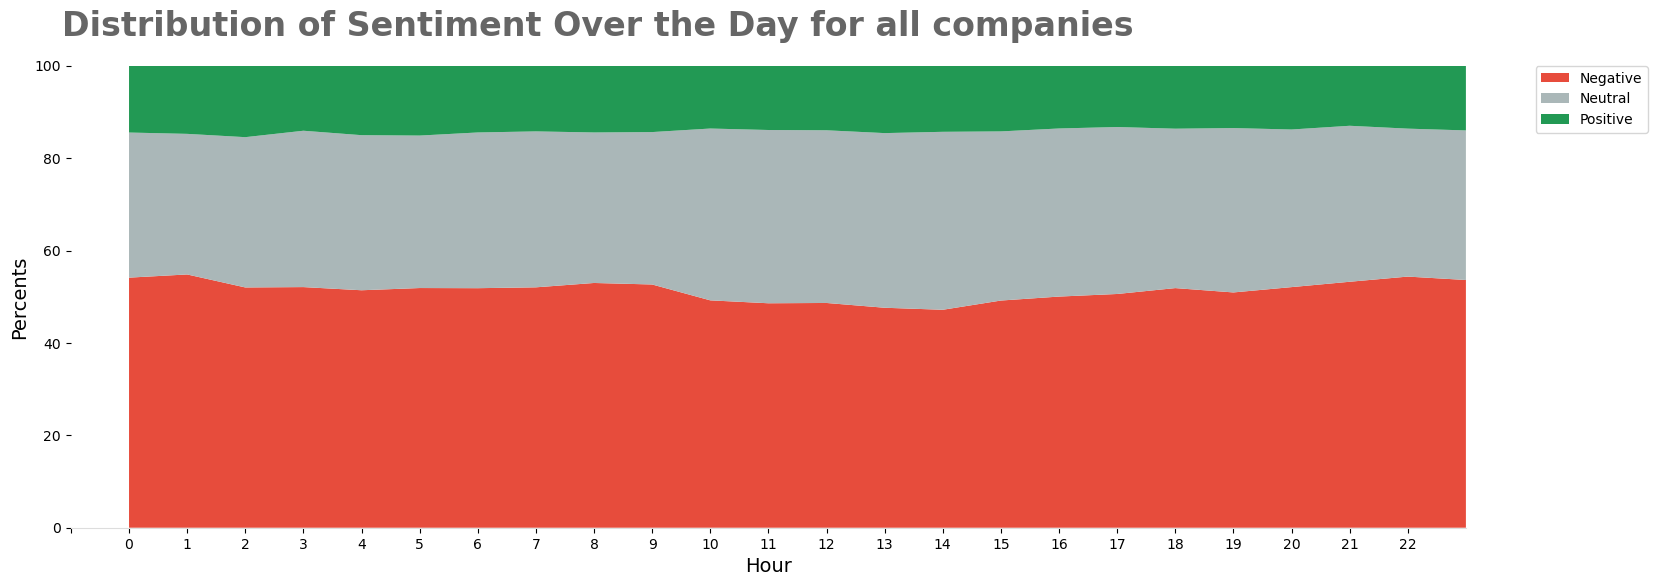

In [188]:
# initialize the axis for plots
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(18,6))

# prepare the data to input in in the plot 
x=range(1,25)
y1=all_companies_sent_df['Negative_%'].loc[:23].to_list()
y2=all_companies_sent_df['Neutral_%'].loc[:23].to_list()
y3=all_companies_sent_df['Positive_%'].loc[:23].to_list()

# ploting 
ax.stackplot(x, y1, y2, y3, labels=['Negative', 'Neutral', 'Positive'], colors=['#E74C3C', '#AAB7B8', '#229954'])

# legend 
ax.legend(['Negative', 'Neutral', 'Positive'], )

# x aixis
ax.set_xlabel('Hour', size=14)
ax.set_xlim(0,24)
ax.set_xticks(ticks=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23], labels=[' ',0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]);

# y axis
ax.set_ylim(0,100)
ax.set_ylabel('Percents', size=14)

# one more legend
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# title
ax.text(x=0.12, y=.93, s="Distribution of Sentiment Over the Day for all companies", transform=fig.transFigure, ha='left', fontsize=24, weight='bold', alpha=.6)

# Axis formatting.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')

# saving code 
fig.get_figure().savefig('Dist_of_sent_over_day.png')

## Sentiment per company about topics: Delay, Price, Luggagge

In [90]:
# the function for finding out about which topic the tweet is 

def which_topic(text):
    
    if 'luggage' in text:
        return 'luggage'

    elif 'delay' in text:
        return 'delay'

    elif 'price' in text:
        return 'price'

    elif 'cheap' in text:
        return 'price'
    
    elif 'expensive' in text:
        return 'price'
    
    elif 'buggage' in text:
        return 'luggage'
    
    elif 'cost' in text:
        return 'price'
    
    elif 'payment' in text:
        return 'price'

    elif 'fee' in text:
        return 'price'

    else:
        return None
    

In [91]:
# apply the above function to get topics in all tweets about companies 

britishairways_tweets['topic'] = britishairways_tweets['text_clean'].progress_apply(lambda row: which_topic(row))
airfrance_klm_tweets['topic'] = airfrance_klm_tweets['text_clean'].progress_apply(lambda row: which_topic(row))
easyjet_tweets['topic'] = easyjet_tweets['text_clean'].progress_apply(lambda row: which_topic(row))
ryanair_tweets['topic'] = ryanair_tweets['text_clean'].progress_apply(lambda row: which_topic(row))
virginatlantic_tweets['topic'] = virginatlantic_tweets['text_clean'].progress_apply(lambda row: which_topic(row))
lufthansa_tweets['topic'] = lufthansa_tweets['text_clean'].progress_apply(lambda row: which_topic(row))
qantas_tweets['topic'] = qantas_tweets['text_clean'].progress_apply(lambda row: which_topic(row))
etihadairways_tweets['topic'] = etihadairways_tweets['text_clean'].progress_apply(lambda row: which_topic(row))
singaporeair_tweets['topic'] = singaporeair_tweets['text_clean'].progress_apply(lambda row: which_topic(row))
airberlin_tweets['topic'] =  airberlin_tweets['text_clean'].progress_apply(lambda row: which_topic(row))

100%|██████████| 338077/338077 [00:02<00:00, 151257.72it/s]
/var/folders/22/gxvfn3cx2_v64ngzhq52h2180000gn/T/ipykernel_51780/2746108856.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  britishairways_tweets['topic'] = britishairways_tweets['text_clean'].progress_apply(lambda row: which_topic(row))
100%|██████████| 268759/268759 [00:01<00:00, 157560.23it/s]
/var/folders/22/gxvfn3cx2_v64ngzhq52h2180000gn/T/ipykernel_51780/2746108856.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airfrance_klm_tweets['

In [92]:
# construct the data frames per specific topic

britishairways_delay = britishairways_tweets[britishairways_tweets['topic']=='delay'][['tweet_id', 'sentiment_label', 'topic']]
britishairways_price = britishairways_tweets[britishairways_tweets['topic']=='price'][['tweet_id', 'sentiment_label', 'topic']]
britishairways_luggage = britishairways_tweets[britishairways_tweets['topic']=='luggage'][['tweet_id', 'sentiment_label', 'topic']]

easyjet_delay = easyjet_tweets[easyjet_tweets['topic']=='delay'][['tweet_id', 'sentiment_label', 'topic']]
easyjet_price = easyjet_tweets[easyjet_tweets['topic']=='price'][['tweet_id', 'sentiment_label', 'topic']]
easyjet_luggage = easyjet_tweets[easyjet_tweets['topic']=='luggage'][['tweet_id', 'sentiment_label', 'topic']]

In [93]:
# prepare the data for the plot function 

# for british airways 
britishairways_delay_sent = britishairways_delay.groupby('sentiment_label').count()[['tweet_id']].rename(columns={'tweet_id':'delay'})
britishairways_luggage_sent = britishairways_luggage.groupby('sentiment_label').count()[['tweet_id']].rename(columns={'tweet_id':'luggage'})
britishairways_price_sent = britishairways_price.groupby('sentiment_label').count()[['tweet_id']].rename(columns={'tweet_id':'price'})

britishairways_topics = pd.merge(britishairways_delay_sent.reset_index(), britishairways_luggage_sent.reset_index(), on='sentiment_label')
britishairways_topics = pd.merge(britishairways_topics, britishairways_price_sent.reset_index(), on='sentiment_label')
britishairways_topics = britishairways_topics.rename(columns={'sentiment_label': 'Sentiment label'})


# for easyjet
easyjet_delay_sent = easyjet_delay.groupby('sentiment_label').count()[['tweet_id']].rename(columns={'tweet_id':'delay'})
easyjet_luggage_sent = easyjet_luggage.groupby('sentiment_label').count()[['tweet_id']].rename(columns={'tweet_id':'luggage'})
easyjet_price_sent = easyjet_price.groupby('sentiment_label').count()[['tweet_id']].rename(columns={'tweet_id':'price'})

easyjet_topics = pd.merge(easyjet_delay_sent.reset_index(), easyjet_luggage_sent.reset_index(), on='sentiment_label')
easyjet_topics = pd.merge(easyjet_topics, easyjet_price_sent.reset_index(), on='sentiment_label')
easyjet_topics = easyjet_topics.rename(columns={'sentiment_label': 'Sentiment label'})

In [94]:
# prepare the data for the plot function

britishairways_topics = britishairways_topics.set_index('Sentiment label').transpose()
easyjet_topics = easyjet_topics.set_index('Sentiment label').transpose()

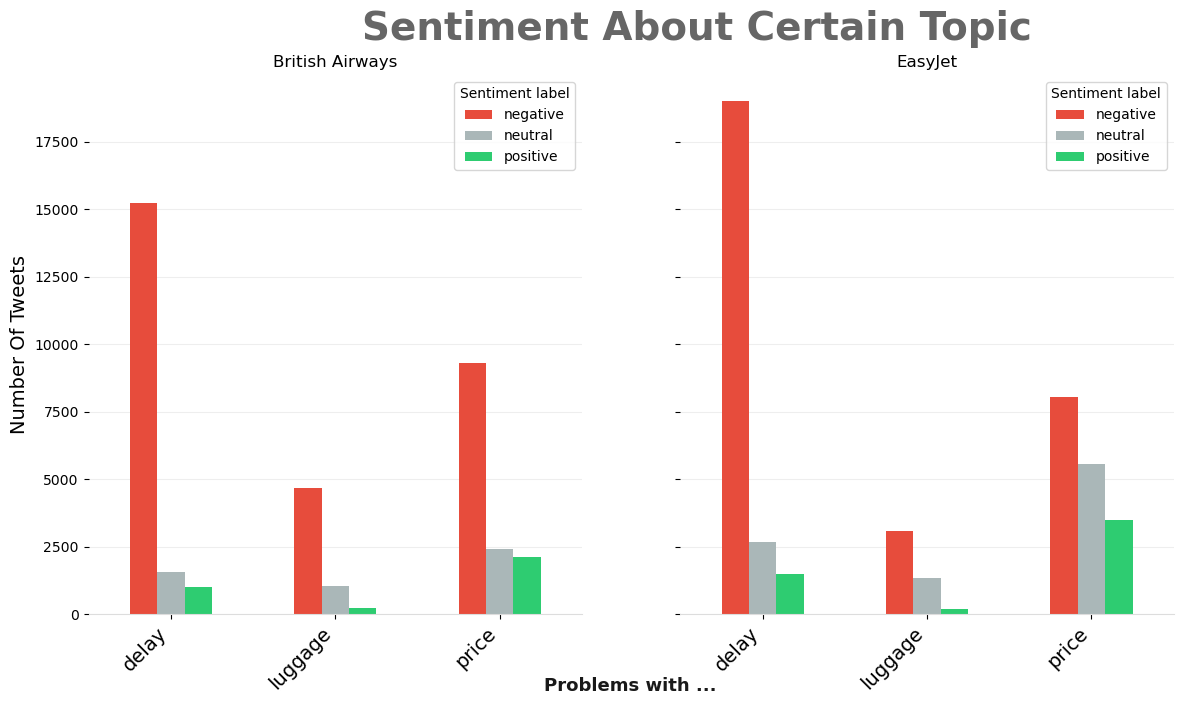

In [189]:
# initialize the figure for the plots 
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,7), sharey=True)

# plots
bars_grouped1 = britishairways_topics.plot(kind='bar', ax=ax[0], color=['#E74C3C', '#AAB7B8', '#2ECC71'])
bars_grouped2 = easyjet_topics.plot(kind='bar', ax=ax[1], color=['#E74C3C', '#AAB7B8', '#2ECC71'])

# title
fig.text(x=0.32, y=.93, s="Sentiment About Certain Topic", transform=fig.transFigure, ha='left', fontsize=28, weight='bold', alpha=.6)

fig.text(x=0.45, y=0, s="Problems with ...", transform=fig.transFigure, ha='left', fontsize=13, alpha=.9, weight='bold')

# set suptite
ax[0].set_title('British Airways')
ax[1].set_title('EasyJet')

# Axis formatting.
ax[0].spines['top'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax[1].spines['left'].set_visible(False)
ax[0].spines['bottom'].set_color('#DDDDDD')
ax[1].spines['bottom'].set_color('#DDDDDD')
ax[0].set_axisbelow(True)
ax[1].set_axisbelow(True)
ax[0].yaxis.grid(True, color='#EEEEEE')
ax[1].yaxis.grid(True, color='#EEEEEE')
ax[0].xaxis.grid(False)
ax[1].xaxis.grid(False)


# x axis 
ax[0].set_xlabel('')
ax[1].set_xlabel('')
ax[0].set_xticks([0,1,2], ['delay', 'luggage', 'price'], rotation=45, ha='right', size=14)
ax[1].set_xticks([0,1,2], ['delay', 'luggage', 'price'], rotation=45, ha='right', size=14)

# y axis 
ax[0].set_ylabel('')
ax[1].set_ylabel('')
ax[0].set_ylabel('Number Of Tweets', size=14)

# saving code
fig.get_figure().savefig('sentiment_about_topics.png')